In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Input data files are available in the "../inputs/bank-marketing/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./inputs/bank-marketing/"))

['bank-additional-full.csv', 'bank-additional-names.txt']


In [2]:
plt.rc('axes', lw = 1.5)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('xtick.major', size = 5, width = 3)
plt.rc('ytick.major', size = 5, width = 3)

In [3]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

In [4]:
data = pd.read_csv("./inputs/bank-marketing/bank-additional-full.csv", sep=';')
data = data.drop('duration',axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


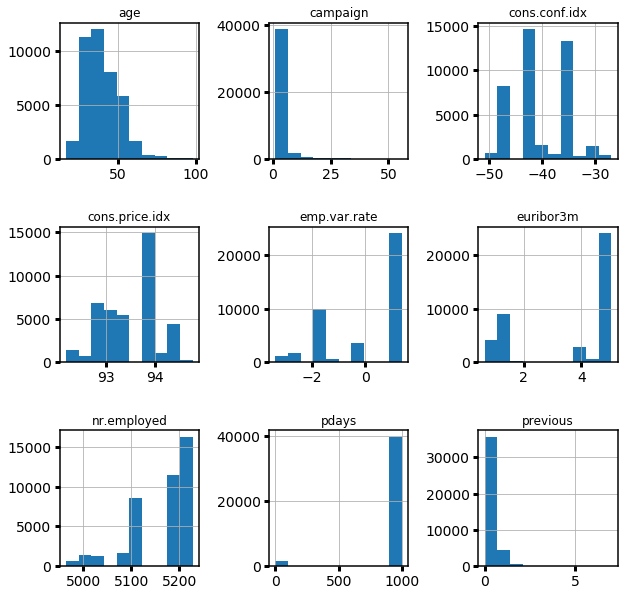

In [5]:
header = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
         'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace=0.5)
plt.show()

In [6]:
data['poutcome'] = data['poutcome'].map({'failure': -1, 'nonexistent': 0,
                                        'success': 1})

In [7]:
data['default'] = data['default'].map({'yes': -1, 'unknown': 0,
                                        'no': 1})
data['housing'] = data['housing'].map({'yes': -1, 'unknown': 0,
                                        'no': 1})
data['loan'] = data['loan'].map({'yes': -1, 'unknown': 0,
                                        'no': 1})

In [8]:
nominal =['job', 'marital', 'education','contact', 'month', 'day_of_week']
dataProcessed = pd.get_dummies(data,columns=nominal)

In [9]:
dataProcessed['y'] = dataProcessed['y'].map({'yes': 1, 'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
1,57,0,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
2,37,1,-1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
3,40,1,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
4,56,1,1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# raw data
X = dataProcessed.drop('y',axis=1).values
y = dataProcessed['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print('Xtrain size: ',X_train.shape)
print('ytrain size: ',y_train.shape)
print('Xtest size: ',X_test.shape)
print('ytest size: ',y_test.shape)

Xtrain size:  (28831, 54)
ytrain size:  (28831,)
Xtest size:  (12357, 54)
ytest size:  (12357,)


In [12]:
# column index of numeric variables
idx_numeric=[0,4,5,6,8,9,10,11,12]
##print(dataProcessed.columns[idx])

# standardize numeric variables only
scaler = StandardScaler()
X_train[:,idx_numeric]=scaler.fit_transform(X_train[:,idx_numeric])
X_test[:,idx_numeric]=scaler.transform(X_test[:,idx_numeric])

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=2, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]}, {'kernel': ['linear'], 'C': [1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [16]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.6652554940546517


In [17]:
from sklearn.metrics import precision_score, accuracy_score

In [18]:
y_true, y_pred = y_test, clf.predict(X_test)
print('precision on the evaluation set: ', precision_score(y_true, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_true, y_pred))

precision on the evaluation set:  0.647834274952919
accuracy on the evaluation set:  0.9002994254268836
